<a href="https://colab.research.google.com/github/hadjerseddik/Crop_classification/blob/main/Evaluation/PlantVillage_Evaluation/PlantVillage_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model,Model,save_model
from sklearn.metrics import confusion_matrix,classification_report

**Mount drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/shared dataset platVillage/PlantVillage.tar.gz' 'PlantVillage.tar.gz'

In [ ]:
!tar -xf PlantVillage.tar.gz

# DATA SET EXPLORATION

**Explore data set partitions**

In [ ]:
trainPath = '/content/PlantVillage/train'
lists = os.listdir(trainPath)
labels = []
file_lst = []

for folder in lists:
    files = os.listdir(trainPath +"/"+folder)
    if(folder != 'background'):   
      files = [folder+'/'+file  for file in files]
      file_lst.extend(files)
      labels.extend([folder.split(sep='___')[0] for i in range(len(files))])

train_df = pd.DataFrame(list(zip(file_lst,labels)),columns =["path","label"])
print(train_df)


                                                    path       label
0      Apple___Black_rot/3ef4204e-d2c3-42b5-ac97-0eab...       Apple
1      Apple___Black_rot/c8269293-ae8c-4ac0-8eb3-6574...       Apple
2      Apple___Black_rot/28f01d7f-27f8-4cf1-a473-ef47...       Apple
3      Apple___Black_rot/7d2062c0-076d-4b98-b9f4-681f...       Apple
4      Apple___Black_rot/9efc127e-4eb6-403a-87f8-1c57...       Apple
...                                                  ...         ...
43439  Strawberry___Leaf_scorch/ceea6873-ef46-46f7-9c...  Strawberry
43440  Strawberry___Leaf_scorch/9051acbe-1e46-4a44-97...  Strawberry
43441  Strawberry___Leaf_scorch/4803b86c-f74e-475e-a9...  Strawberry
43442  Strawberry___Leaf_scorch/ba16fdd7-f417-41ad-96...  Strawberry
43443  Strawberry___Leaf_scorch/3b44d2b5-fc5a-497c-92...  Strawberry

[43444 rows x 2 columns]


In [ ]:
trainPath = '/content/PlantVillage/val'
lists = os.listdir(trainPath)
labels = []
file_lst = []

for folder in lists:
    files = os.listdir(trainPath +"/"+folder)
    if(folder != 'background'):   
      files = [folder+'/'+file  for file in files]
      file_lst.extend(files)
      labels.extend([folder.split(sep='___')[0] for i in range(len(files))])

val_df = pd.DataFrame(list(zip(file_lst,labels)),columns =["path","label"])
print(train_df)


                                                    path   label
0      Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e8d8b4...  Tomato
1      Tomato___Tomato_Yellow_Leaf_Curl_Virus/5c52035...  Tomato
2      Tomato___Tomato_Yellow_Leaf_Curl_Virus/1cda9da...  Tomato
3      Tomato___Tomato_Yellow_Leaf_Curl_Virus/0823f22...  Tomato
4      Tomato___Tomato_Yellow_Leaf_Curl_Virus/255d2f7...  Tomato
...                                                  ...     ...
10856  Grape___Esca_(Black_Measles)/bff8b3c0-40f2-4a2...   Grape
10857  Grape___Esca_(Black_Measles)/42d4646d-f709-4c2...   Grape
10858  Grape___Esca_(Black_Measles)/d2cb8221-a948-4c9...   Grape
10859  Grape___Esca_(Black_Measles)/dfccf859-9e06-433...   Grape
10860  Grape___Esca_(Black_Measles)/ada4cd43-07d6-4cc...   Grape

[10861 rows x 2 columns]


In [ ]:
val_df.to_csv('/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/validation.csv')

In [ ]:
train_df.to_csv('/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/train.csv')

**Visualize Dataset**

In [ ]:
datasetpath = '/content/drive/MyDrive/dataset/PlantVillage'
lists = os.listdir(datasetpath)
labels = []
file_lst = []
 
for folder in lists:
    files = os.listdir(datasetpath +"/"+folder)
    if(folder != 'background'):   
      files = [folder+'/'+file  for file in files]
      file_lst.extend(files)
      labels.extend([folder.split(sep='___')[0] for i in range(len(files))])

df = pd.DataFrame(list(zip(file_lst,labels)),columns =["path","label"])


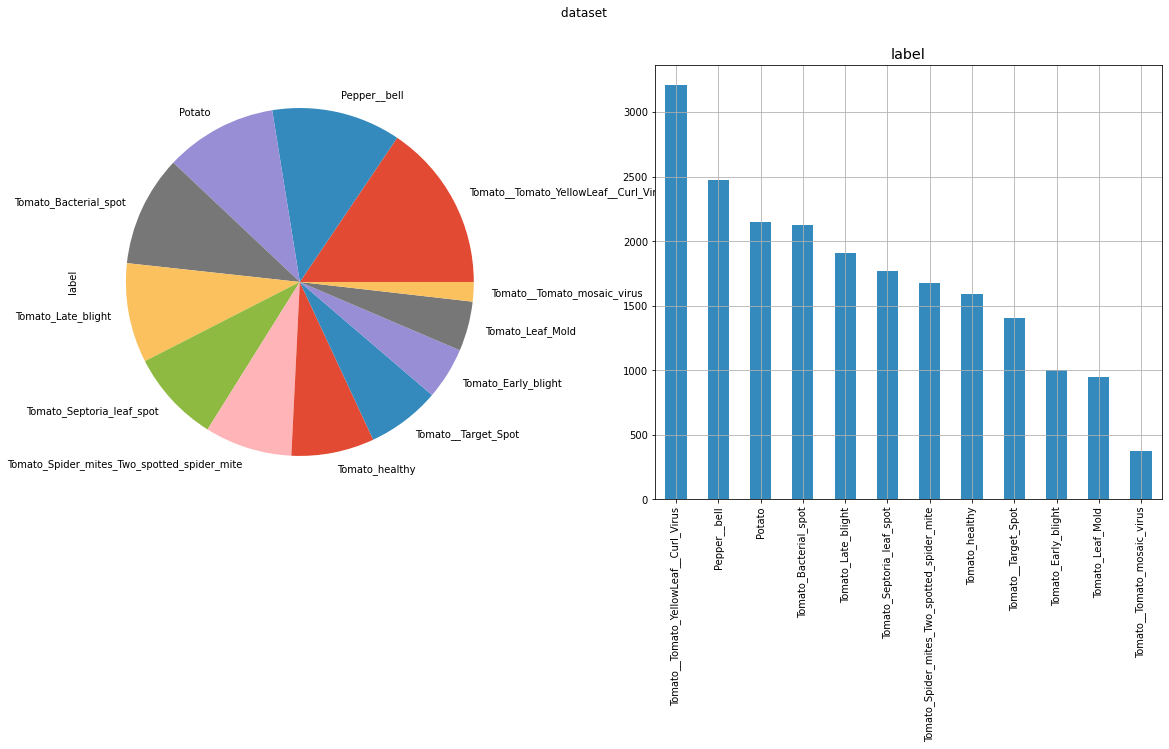

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
with plt.style.context('ggplot'):
  df['label'].value_counts().plot(kind='pie', title='dataset ',ax = axes[0],subplots=True)
  df['label'].value_counts().plot(kind='bar', color='C1',title='dataset ',ax = axes[1],subplots=True)

# Get Validation data


In [ ]:
validationPath= '/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/validation.csv'
validation_df= pd.read_csv(validationPath)
print(validation_df)

       Unnamed: 0                                               path   label
0               0  Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e8d8b4...  Tomato
1               1  Tomato___Tomato_Yellow_Leaf_Curl_Virus/5c52035...  Tomato
2               2  Tomato___Tomato_Yellow_Leaf_Curl_Virus/1cda9da...  Tomato
3               3  Tomato___Tomato_Yellow_Leaf_Curl_Virus/0823f22...  Tomato
4               4  Tomato___Tomato_Yellow_Leaf_Curl_Virus/255d2f7...  Tomato
...           ...                                                ...     ...
10856       10856  Grape___Esca_(Black_Measles)/bff8b3c0-40f2-4a2...   Grape
10857       10857  Grape___Esca_(Black_Measles)/42d4646d-f709-4c2...   Grape
10858       10858  Grape___Esca_(Black_Measles)/d2cb8221-a948-4c9...   Grape
10859       10859  Grape___Esca_(Black_Measles)/dfccf859-9e06-433...   Grape
10860       10860  Grape___Esca_(Black_Measles)/ada4cd43-07d6-4cc...   Grape

[10861 rows x 3 columns]


In [ ]:
image_size = (224,224)
batch_size = 128
data_set_path = '/content/PlantVillage/val'
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
                  dataframe=validation_df,
                  x_col="path",
                  y_col="label",
                  directory= data_set_path,
                  target_size=image_size,
                  batch_size=batch_size,
                  shuffle=False
                  ) 

Found 10861 validated image filenames belonging to 14 classes.


In [ ]:
model_path = '/content/drive/MyDrive/Plant classification/Results/CollectedDataset/XceptionArch/XceptionArch.h5'
model = load_model(model_path)

In [ ]:
def train_result(history_path):
  train_result_df = pd.read_csv(history_path,index_col=0)
  return train_result_df

In [ ]:
def plot_train_history(train_result_df):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
  train_result_df.plot(ax=axes[0],y=['accuracy','val_accuracy'],xlabel='epochs',ylabel='Accuracy')
  train_result_df.plot(ax=axes[1],y=['loss','val_loss'],xlabel='epochs',ylabel='Loss')
  



In [ ]:
def crops_evaluate_mdoel(model,validation_generator):
  classes_names =list(validation_generator.class_indices.keys())
  validation_generator.reset()

  start_time = time.time()
  results = model.predict(validation_generator)
  nb_example = np.array(results).shape[1]
  prediction_duration = (time.time() - start_time)/nb_example

  results = np.array(results)
  predicted_labels_idx = np.argmax(results,axis=1)
  predicted_labels_names = np.array([classes_names[label] for label in predicted_labels_idx])

  real_labels_idx = validation_generator.labels
  real_labels_names = np.array([classes_names[label] for label in real_labels_idx])

  report = classification_report(real_labels_names,predicted_labels_names,labels=classes_names,digits=3,output_dict=True)
  
  result_labels = {}
  for label in classes_names:
    crop_result = report[label]
    result_labels[label]=crop_result

  results_df = pd.DataFrame.from_dict(result_labels,orient='index') 
  
  return results_df

# Global Evaluation

In [ ]:
def global_evaluate_mdoel(model,validation_generator):

  classes_names =list(validation_generator.class_indices.keys())
  validation_generator.reset()

  start_time = time.time()
  results = model.predict(validation_generator)
  nb_example = np.array(results).shape[1]
  prediction_duration = (time.time() - start_time)/nb_example

  results = np.array(results)
  predicted_labels_idx = np.argmax(results,axis=1)
  predicted_labels_names = np.array([classes_names[label] for label in predicted_labels_idx])

  real_labels_idx = validation_generator.labels
  real_labels_names = np.array([classes_names[label] for label in real_labels_idx])

  report = classification_report(real_labels_names,predicted_labels_names,labels=classes_names,digits=3,output_dict=True)
  model_result = {'prediction_duration':prediction_duration,'Accuracy':report['accuracy'],'Precision':report['macro avg']['precision'],'Recall':report['macro avg']['recall'],'F1-score':report['macro avg']['f1-score']}
  
  return model_result

## Dataset result (iterate over architectures)

INFO: Srart test of : MobileNetArch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   0.020736  0.994502  0.012473      0.996600
1   0.015488  0.995476  0.007801      0.997859
2   0.009899  0.997173  0.007365      0.997733
3   0.006080  0.998806  0.007319      0.998111
4   0.005186  0.998712  0.006734      0.998111
5   0.003468  0.999246  0.005723      0.998489
6   0.003572  0.999152  0.005094      0.998489
7   0.002917  0.999372  0.004840      0.998615
8   0.002199  0.999654  0.004514      0.998615
9   0.002560  0.999435  0.005075      0.998237
10  0.001648  0.999780  0.004903      0.998237
11  0.001596  0.999654  0.005021      0.998237
12  0.001687  0.999717  0.005022      0.998237
13  0.001664  0.999560  0.004726      0.998489
14  0.001517  0.999780  0.004713      0.998489
  -----> training plots
  -----> print results per crop
                         precision    recall  f1-score  support
Apple                     0.996850  0.996850  0.996850      635
Bl

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:486: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


INFO: Srart test of : xceptionArch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   0.471790  0.867323  0.034877      0.990701
1   0.037073  0.990862  0.015142      0.995765
2   0.018382  0.995304  0.011446      0.996685
3   0.011887  0.997307  0.009406      0.997422
4   0.008501  0.998274  0.007183      0.997790
5   0.006890  0.998343  0.007135      0.997606
6   0.005523  0.998642  0.006782      0.997974
7   0.004335  0.999217  0.006386      0.997974
8   0.003645  0.999217  0.005951      0.998711
9   0.003173  0.999379  0.005894      0.998527
10  0.002473  0.999563  0.005344      0.998251
11  0.002297  0.999563  0.005217      0.998527
12  0.002084  0.999655  0.005242      0.998435
13  0.001894  0.999747  0.004992      0.998711
14  0.002116  0.999586  0.005118      0.998619
  -----> training plots
  -----> print results per crop
                         precision    recall  f1-score  support
Apple                     0.993740  1.000000  0.996860      635
Blu

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:486: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


INFO: Srart test of : IncepArch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   0.209038  0.941097  0.010502      0.997514
1   0.017881  0.995143  0.006494      0.998251
2   0.009685  0.997330  0.005497      0.998711
3   0.005764  0.998527  0.004375      0.999171
4   0.004766  0.998780  0.003521      0.999263
5   0.003446  0.999194  0.003366      0.999263
6   0.002579  0.999540  0.004881      0.998711
7   0.002265  0.999494  0.003267      0.999263
8   0.001811  0.999609  0.003490      0.998987
9   0.001478  0.999655  0.003610      0.999263
10  0.001713  0.999701  0.003479      0.998987
11  0.001240  0.999701  0.003381      0.999171
12  0.001559  0.999563  0.004532      0.998987
13  0.001578  0.999540  0.003604      0.998987
14  0.001492  0.999701  0.003712      0.999171
  -----> training plots
  -----> print results per crop
                         precision    recall  f1-score  support
Apple                     1.000000  0.998425  0.999212      635
Bluebe

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:486: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


INFO: Srart test of : EfficientB3Arch
  -----> training history
        loss  accuracy    val_loss  val_accuracy
0   0.468534  0.873308  162.467285      0.261026
1   0.049788  0.986626    0.682533      0.773317
2   0.027958  0.992220    0.462596      0.851671
3   0.018891  0.994844    0.083334      0.973207
4   0.012728  0.996524    0.136028      0.957278
5   0.010655  0.997215    0.158385      0.945033
6   0.008546  0.997629    0.080649      0.974312
7   0.007768  0.997859    0.069840      0.977350
8   0.005981  0.998366    0.056729      0.982967
9   0.005044  0.998734   58.834644      0.177424
10  0.004996  0.998504    0.081318      0.974772
11  0.004031  0.998964    0.012489      0.996593
12  0.003819  0.998895    0.007028      0.998251
13  0.003562  0.999148    0.459539      0.856827
14  0.003212  0.999240    0.061995      0.981033
  -----> training plots


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:486: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


  -----> print results per crop
                         precision  recall  f1-score  support
Apple                     0.000000     0.0  0.000000      635
Blueberry                 0.000000     0.0  0.000000      300
Cherry_(including_sour)   0.000000     0.0  0.000000      380
Corn_(maize)              0.000000     0.0  0.000000      772
Grape                     0.000000     0.0  0.000000      811
Orange                    0.000000     0.0  0.000000     1102
Peach                     0.000000     0.0  0.000000      531
Pepper,_bell              0.000000     0.0  0.000000      495
Potato                    0.000000     0.0  0.000000      431
Raspberry                 0.000000     0.0  0.000000       74
Soybean                   0.000000     0.0  0.000000     1018
Squash                    0.000000     0.0  0.000000      367
Strawberry                0.000000     0.0  0.000000      314
Tomato                    0.334315     1.0  0.501104     3631
  -----> plot results per crop


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INFO: Srart test of : DensNetArch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   0.128143  0.965151  0.007714      0.997974
1   0.012356  0.996939  0.007929      0.997790
2   0.007545  0.998089  0.002915      0.999540
3   0.003928  0.999148  0.003028      0.999263
4   0.002948  0.999448  0.002258      0.999448
5   0.001985  0.999471  0.002775      0.999355
6   0.002190  0.999425  0.002255      0.999448
7   0.002017  0.999540  0.002081      0.999540
8   0.001572  0.999747  0.002472      0.999448
9   0.001141  0.999839  0.002006      0.999724
10  0.000747  0.999908  0.001634      0.999816
11  0.001361  0.999655  0.001838      0.999724
12  0.000804  0.999908  0.001614      0.999724
13  0.000897  0.999839  0.001793      0.999724
14  0.000683  0.999931  0.001614      0.999724
  -----> training plots
  -----> print results per crop
                         precision    recall  f1-score  support
Apple                     1.000000  1.000000  1.000000      635
Blue

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:486: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


INFO: Srart test of : ResNetArch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   0.123072  0.966232  0.012947      0.995949
1   0.007782  0.998159  0.005696      0.998159
2   0.004732  0.998872  0.003928      0.998619
3   0.002316  0.999471  0.003570      0.998803
4   0.001585  0.999770  0.003735      0.998803
5   0.001460  0.999678  0.003528      0.998803
6   0.001805  0.999586  0.003215      0.998987
7   0.000944  0.999793  0.002850      0.999171
8   0.001091  0.999770  0.003314      0.999171
9   0.001082  0.999747  0.003266      0.998987
10  0.000807  0.999793  0.002924      0.998987
11  0.000998  0.999701  0.002856      0.999079
12  0.000671  0.999908  0.003376      0.998987
13  0.000470  0.999931  0.002680      0.999171
14  0.000693  0.999747  0.002738      0.999171
  -----> training plots
  -----> print results per crop
                         precision    recall  f1-score  support
Apple                     1.000000  1.000000  1.000000      635
Blueb

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:486: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


INFO: Srart test of : NasNetArch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   0.252045  0.928091  0.367072      0.886290
1   0.022261  0.993164  0.109280      0.964828
2   0.010179  0.997261  0.029448      0.990240
3   0.007894  0.997836  0.015499      0.995488
4   0.005229  0.998642  0.014236      0.995488
5   0.004131  0.998734  0.009039      0.997146
6   0.002298  0.999425  0.007230      0.998066
7   0.002665  0.999240  0.006192      0.997790
8   0.001702  0.999632  0.004986      0.998343
9   0.001595  0.999632  0.005694      0.998527
10  0.001483  0.999655  0.005454      0.998251
11  0.001625  0.999563  0.006773      0.997974
12  0.001332  0.999701  0.006577      0.998066
13  0.001550  0.999471  0.008363      0.997790
14  0.001301  0.999540  0.005964      0.998343
  -----> training plots
  -----> print results per crop
                         precision    recall  f1-score  support
Apple                     0.995298  1.000000  0.997643      635
Blueb

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:486: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


INFO: Srart test of : VGG19Arch
  -----> training history
        loss  accuracy  val_loss  val_accuracy
0   0.281149  0.913981  0.042805      0.986465
1   0.046151  0.985015  0.032123      0.989596
2   0.022684  0.993049  0.034598      0.988951
3   0.015792  0.995258  0.012130      0.996501
4   0.011624  0.996340  0.009271      0.997330
5   0.005643  0.998297  0.010311      0.996870
6   0.003171  0.999102  0.010262      0.997514
7   0.005187  0.998205  0.021667      0.993647
8   0.006202  0.998297  0.006412      0.998435
9   0.003287  0.998964  0.009127      0.997606
10  0.002030  0.999355  0.026116      0.993002
11  0.002273  0.999263  0.009818      0.997606
12  0.002705  0.999194  0.007782      0.998159
13  0.002716  0.999402  0.006240      0.998711
14  0.001438  0.999586  0.014760      0.996409
  -----> training plots
  -----> print results per crop
                         precision    recall  f1-score  support
Apple                     0.998405  0.985827  0.992076      635
Bluebe

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:486: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  ax.set_ylim(self.ylim)


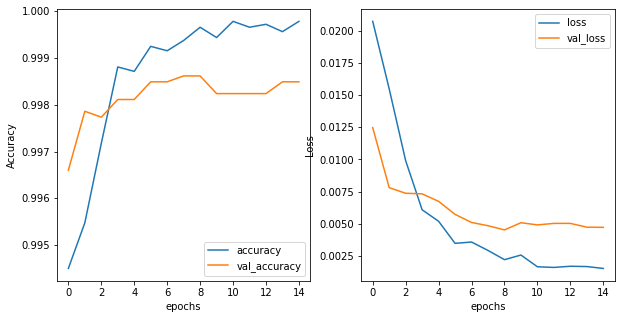

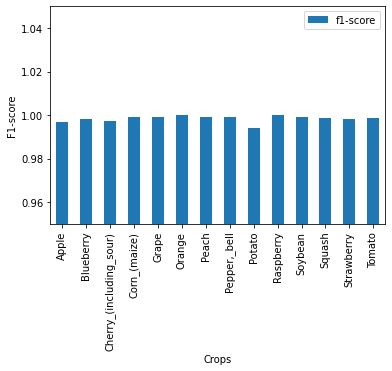

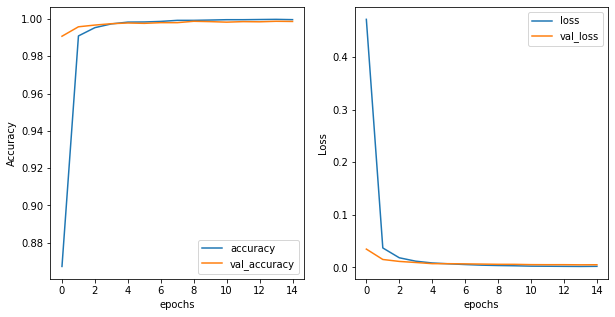

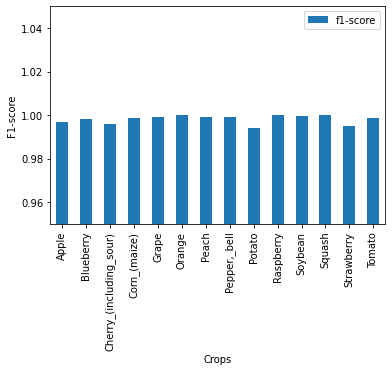

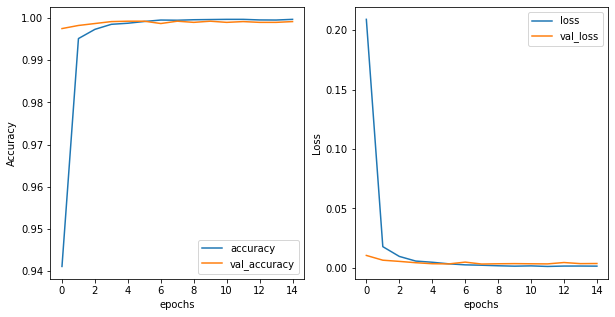

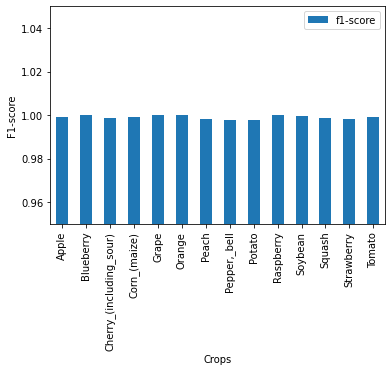

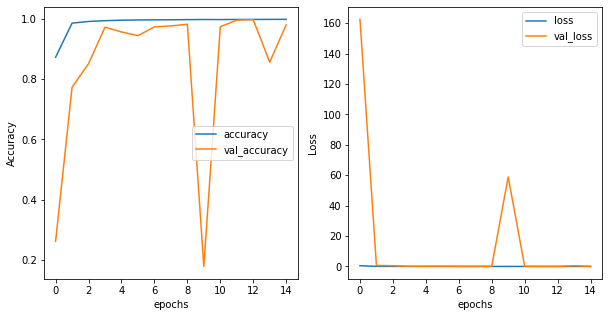

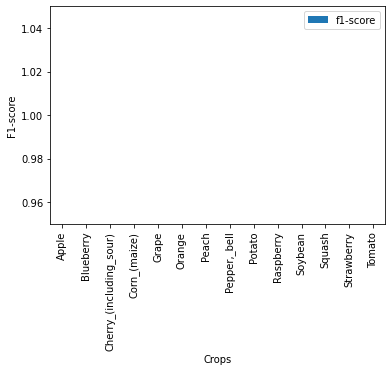

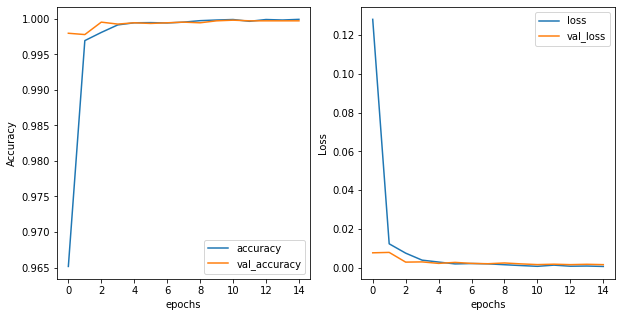

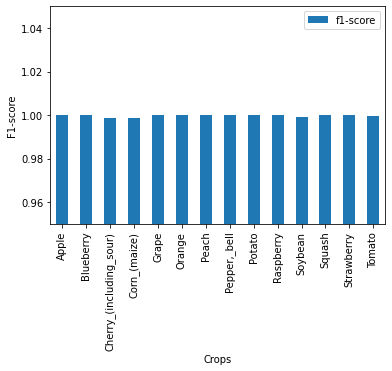

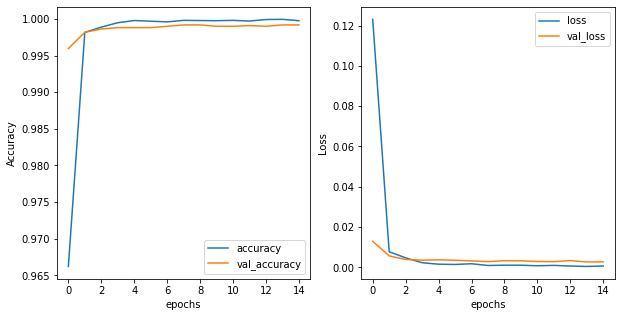

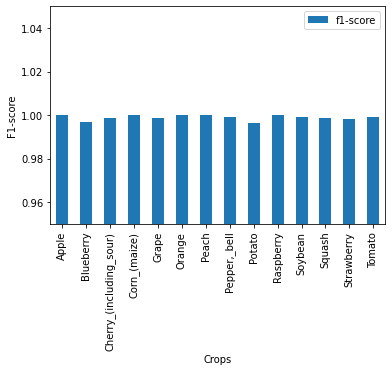

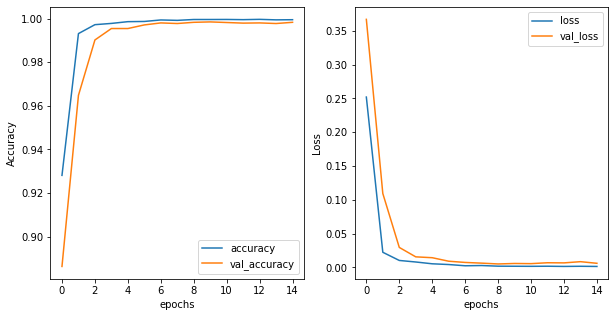

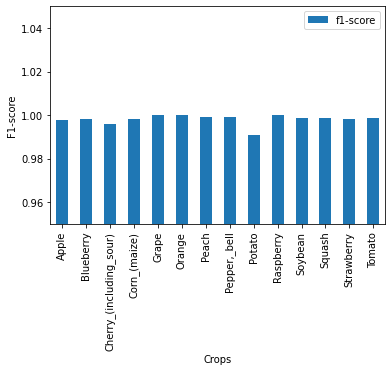

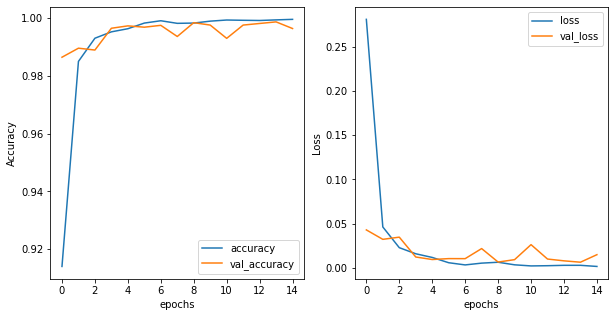

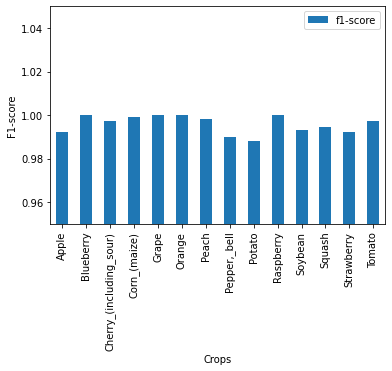

In [ ]:
dataset_folder_path ='/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet'
archs = os.listdir(dataset_folder_path)
archs.remove('train.csv')
archs.remove('validation.csv')
archs.remove('NoteBooks')
archs.remove('.ipynb_checkpoints')
archs.remove('Saved')

model_results={}
for arch in archs:
  print('INFO: Srart test of : ' + arch)
  model_path = os.path.join(dataset_folder_path,arch,arch+'.h5')
  model = load_model(model_path)
  
  history_path = os.path.join(dataset_folder_path,arch,'history.csv')
  train_result_df = train_result(history_path)
  print("  -----> training history")
  print(train_result_df)
  print("  -----> training plots")
  plot_train_history(train_result_df)

  plt.savefig('plot.png')

  crop_results_df = crops_evaluate_mdoel(model,validation_generator)
  print("  -----> print results per crop")
  print(crop_results_df)
  
  
  print("  -----> plot results per crop")

  crop_results_df.plot(y='f1-score',kind='bar',ylim=(1,1))
  plt.xlabel('Crops')
  plt.ylabel('F1-score')
  
  plt.savefig('f1-score.png')
  crop_results_df.to_csv('/content/Saved/csv files/crop_results_df.csv')
 
  
  model_result = global_evaluate_mdoel(model,validation_generator)
  model_results[arch]=model_result

In [ ]:
glpbal_resuls_df = pd.DataFrame.from_dict(model_results,orient='index')
print("INFO: print global results")
print(glpbal_resuls_df)
glpbal_resuls_df.to_csv('/content/Saved/csv files/Global_result_df.csv') 


INFO: print global results
                 prediction_duration  Accuracy  Precision    Recall  F1-score
MobileNetArch               1.601457  0.998711   0.998550  0.998384  0.998465
xceptionArch                6.514560  0.998619   0.998122  0.998342  0.998229
IncepArch                   3.074363  0.999171   0.998920  0.999190  0.999054
EfficientB3Arch             5.063549  0.334315   0.023880  0.071429  0.035793
DensNetArch                 4.042887  0.999724   0.999818  0.999649  0.999733
ResNetArch                  7.906844  0.999171   0.998958  0.998901  0.998929
NasNetArch                  2.922432  0.998343   0.998067  0.998074  0.998067
VGG19Arch                   6.148497  0.996409   0.996593  0.995189  0.995861


INFO: plot global results


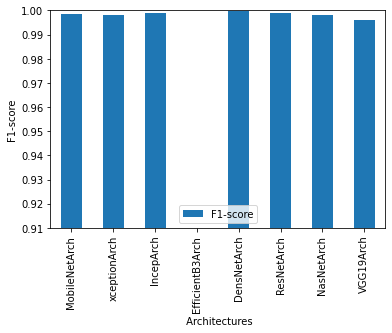

In [ ]:
print("INFO: plot global results")
glpbal_resuls_df.plot(y='F1-score',kind='bar',ylim=(0.8,1))
plt.xlabel(" Architectures")
plt.ylabel("F1-score")
plt.savefig('Global result plot .png')

Confusion Matrix

In [ ]:
model = model = load_model('/content/drive/MyDrive/Plant classification/Results/CollectedDataset/ DenseNet121Arch/ DenseNet121Arch.h5')

In [ ]:
validationPath= '/content/drive/MyDrive/Plant classification/Results/PlantVillageDataSet/validation.csv'
validation_df= pd.read_csv(validationPath)
print(validation_df)

       Unnamed: 0                                               path   label
0               0  Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e8d8b4...  Tomato
1               1  Tomato___Tomato_Yellow_Leaf_Curl_Virus/5c52035...  Tomato
2               2  Tomato___Tomato_Yellow_Leaf_Curl_Virus/1cda9da...  Tomato
3               3  Tomato___Tomato_Yellow_Leaf_Curl_Virus/0823f22...  Tomato
4               4  Tomato___Tomato_Yellow_Leaf_Curl_Virus/255d2f7...  Tomato
...           ...                                                ...     ...
10856       10856  Grape___Esca_(Black_Measles)/bff8b3c0-40f2-4a2...   Grape
10857       10857  Grape___Esca_(Black_Measles)/42d4646d-f709-4c2...   Grape
10858       10858  Grape___Esca_(Black_Measles)/d2cb8221-a948-4c9...   Grape
10859       10859  Grape___Esca_(Black_Measles)/dfccf859-9e06-433...   Grape
10860       10860  Grape___Esca_(Black_Measles)/ada4cd43-07d6-4cc...   Grape

[10861 rows x 3 columns]


In [ ]:
Classes_names =list(validation_generator.class_indices.keys())

In [ ]:
validation_generator.reset()
results = model.predict(validation_generator)
results = np.array(results)
predicted_labels_idx = np.argmax(results,axis=1)
predicted_labels_names = np.array([Classes_names[label] for label in predicted_labels_idx])
print(predicted_labels_names.shape)

(10861,)


In [ ]:
real_labels_idx = validation_generator.labels
real_labels_names = np.array([Classes_names[label] for label in real_labels_idx])
print(real_labels_names.shape) 

(10861,)


In [ ]:
conf_matrix = confusion_matrix(real_labels_names,predicted_labels_names,labels=Classes_names,normalize='pred')
conf_matrix_df = pd.DataFrame(conf_matrix, index = Classes_names,columns = Classes_names) 

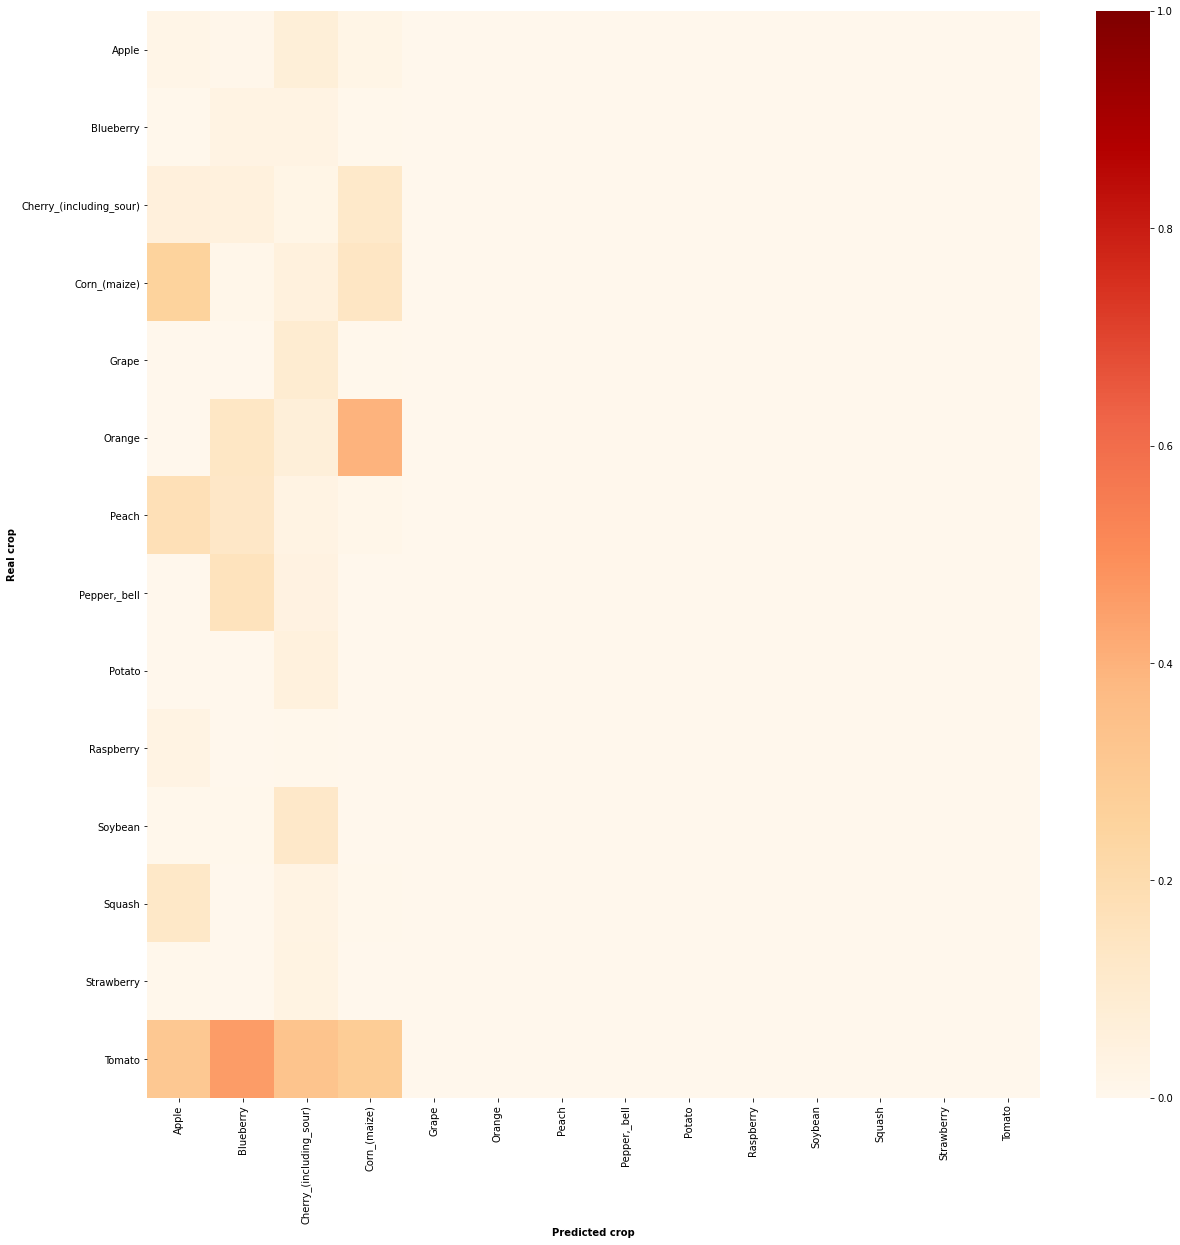

In [ ]:
import seaborn as sn 
from sklearn.metrics import confusion_matrix,classification_report

plt.figure(figsize = (20,20))
heatmap = sn.heatmap(conf_matrix_df, annot=False,fmt='.2f',cmap="OrRd",vmin=0, vmax=1)
heatmap.set_xlabel('Predicted crop',fontsize = 10,fontweight="bold")
heatmap.set_ylabel('Real crop',fontsize = 10,fontweight="bold")
heatmap.figure.savefig("Confusion matrix.png")